### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


 # 1. Análise do faturamento


In [ ]:
faturamento_lojas = {
    "Loja 1": loja["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum()
}
for nome_loja, total in faturamento_lojas.items():
    print(f"{nome_loja}: R$ {total:,.2f}")

Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


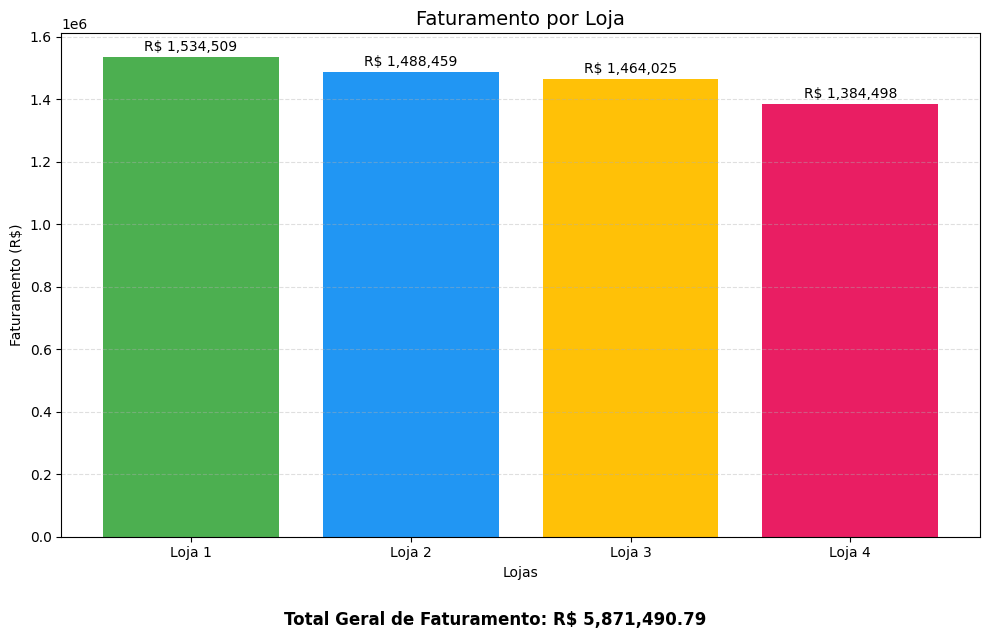

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
cores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']
total_geral = sum(faturamento)


plt.figure(figsize=(10,6))
plt.bar(lojas, faturamento, color=cores)


plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.4)


for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=10)


plt.figtext(0.5, -0.05, f"Total Geral de Faturamento: R$ {total_geral:,.2f}",
            ha="center", fontsize=12, weight='bold', color='black')


plt.tight_layout()
plt.savefig("faturamento_lojas_com_total_abaixo.png", dpi=300, bbox_inches='tight')
plt.show()


# 2. Vendas por Categoria

In [ ]:

print("Loja 1 - Produtos por Categoria")
print(loja["Categoria do Produto"].value_counts())
print("\n")

print("Loja 2 - Produtos por Categoria")
print(loja2["Categoria do Produto"].value_counts())
print("\n")

print("Loja 3 - Produtos por Categoria")
print(loja3["Categoria do Produto"].value_counts())
print("\n")

print("Loja 4 - Produtos por Categoria")
print(loja4["Categoria do Produto"].value_counts())
print("\n")


Loja 1 - Produtos por Categoria
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


Loja 2 - Produtos por Categoria
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


Loja 3 - Produtos por Categoria
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64


Loja 4 - Produtos por Categoria
Categoria do Produto
moveis  

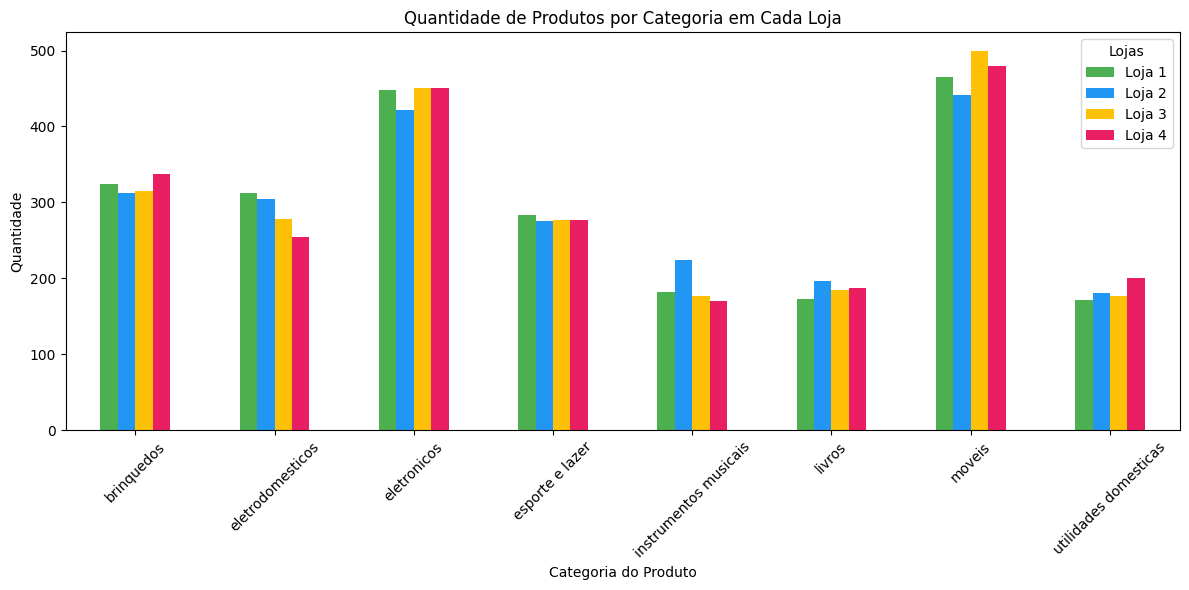

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for df in [loja1, loja2, loja3, loja4]:
    df.columns = df.columns.str.strip()


categoria_loja1 = loja1["Categoria do Produto"].value_counts()
categoria_loja2 = loja2["Categoria do Produto"].value_counts()
categoria_loja3 = loja3["Categoria do Produto"].value_counts()
categoria_loja4 = loja4["Categoria do Produto"].value_counts()


df_categorias = pd.DataFrame({
    "Loja 1": categoria_loja1,
    "Loja 2": categoria_loja2,
    "Loja 3": categoria_loja3,
    "Loja 4": categoria_loja4
}).fillna(0)


cores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']


df_categorias.plot(kind="bar", figsize=(12, 6), color=cores)
plt.title("Quantidade de Produtos por Categoria em Cada Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()


print("Média de Avaliação da Compra:")
print(f"Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")








Média de Avaliação da Compra:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


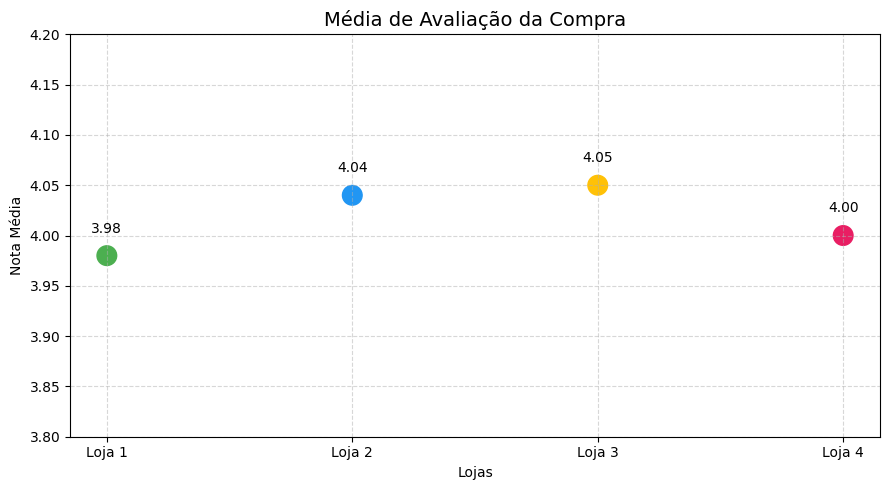

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
cores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(9,5))

# Plotando os pontos
plt.scatter(x, avaliacoes, color=cores, s=200)

# Adicionando os valores acima dos pontos
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.02, f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

# Configurações do gráfico
plt.title("Média de Avaliação da Compra", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Nota Média")
plt.xticks(x, lojas)  # Define os nomes das lojas no eixo X
plt.ylim(3.8, 4.2)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("grafico_dispersao_avaliacao.png", dpi=300, bbox_inches='tight')
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produto_destaque(loja_df, nome_loja):
    contagem = loja_df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    print(f"{nome_loja} - Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"{nome_loja} - Produto menos vendido: {menos_vendido} ({contagem.min()} venda)")
    print("-" * 50)

produto_destaque(loja, "Loja 1")
produto_destaque(loja2, "Loja 2")
produto_destaque(loja3, "Loja 3")
produto_destaque(loja4, "Loja 4")


Loja 1 - Produto mais vendido: Micro-ondas (60 vendas)
Loja 1 - Produto menos vendido: Headset (33 venda)
--------------------------------------------------
Loja 2 - Produto mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Produto menos vendido: Jogo de tabuleiro (32 venda)
--------------------------------------------------
Loja 3 - Produto mais vendido: Kit banquetas (57 vendas)
Loja 3 - Produto menos vendido: Blocos de montar (35 venda)
--------------------------------------------------
Loja 4 - Produto mais vendido: Cama box (62 vendas)
Loja 4 - Produto menos vendido: Guitarra (33 venda)
--------------------------------------------------


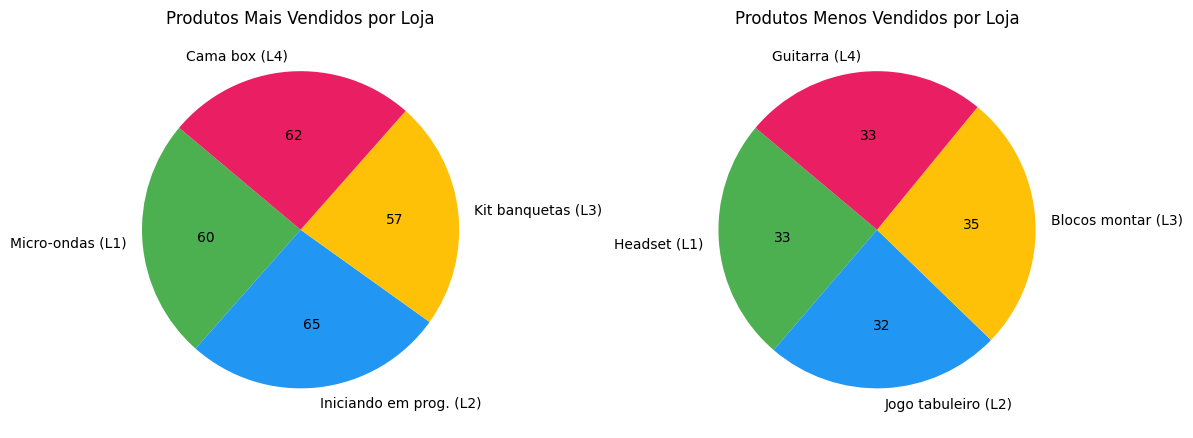

In [ ]:
import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Headset (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_padronizadas = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

# Função para mostrar apenas os valores absolutos
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

plt.figure(figsize=(12, 6))

# Gráfico - Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Mais Vendidos por Loja')

# Gráfico - Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Menos Vendidos por Loja')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:

frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()


print("Frete Médio por Loja:")
print(f"Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Loja 4: R$ {frete_medio_loja4:.2f}")


Frete Médio por Loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


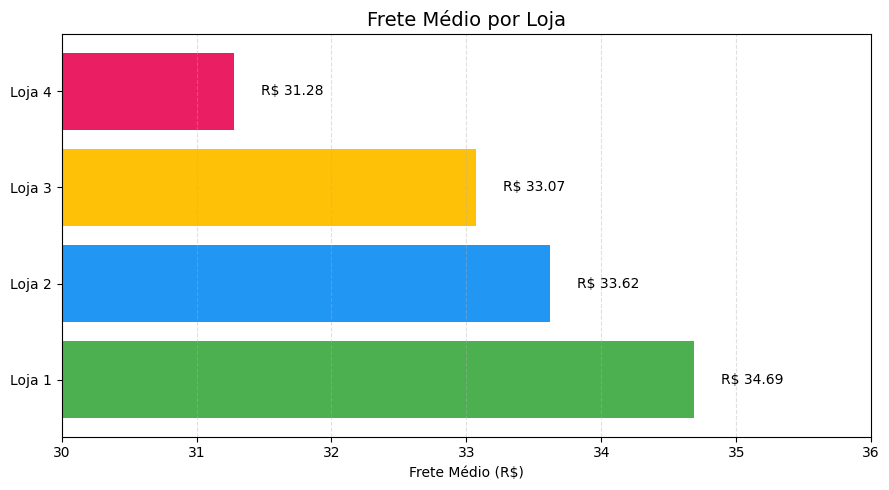

In [ ]:
import matplotlib.pyplot as plt


lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes_medios = [34.69, 33.62, 33.07, 31.28]
cores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']  # mesmas cores do gráfico de faturamento


plt.figure(figsize=(9,5))
plt.barh(lojas, fretes_medios, color=cores)


plt.title("Frete Médio por Loja", fontsize=14)
plt.xlabel("Frete Médio (R$)")
plt.xlim(30, 36)
plt.grid(axis='x', linestyle='--', alpha=0.4)


for i, valor in enumerate(fretes_medios):
    plt.text(valor + 0.2, i, f"R$ {valor:.2f}", va='center', fontsize=10)


plt.tight_layout()
plt.savefig("frete_medio_por_loja_horizontal.png", dpi=300, bbox_inches='tight')
plt.show()


# 📊 Relatório Final:


## 📝 Introdução

Este relatório tem como objetivo apoiar o Senhor João na tomada de decisão sobre qual de suas quatro lojas virtuais deve ser vendida. A análise foi baseada em cinco principais indicadores:

- **Faturamento total**
- **Categorias de produtos mais e menos vendidas**
- **Média das avaliações dos clientes**
- **Produtos mais e menos vendidos**
- **Frete médio**

Com base nesses dados, avaliamos os pontos fortes e fracos de cada loja e elaboramos uma recomendação final, apoiada em visualizações e métricas.

---

## 📈 Desenvolvimento

### 1. Faturamento Total

> **📌 Conclusão:** A **Loja 1** apresenta o maior faturamento. A **Loja 4** teve o menor desempenho neste critério.

---

### 2. Categorias de Produtos Mais e Menos Vendidas

A análise mostrou que as **categorias mais vendidas** nas lojas foram:

- **Loja 1 e 2**: Destaque para *Acessórios* e *Celulares*
- **Loja 4**: Menor volume nas categorias mais populares

> **📌 Conclusão:** A **Loja 4** teve menor presença nas categorias de maior saída.

---

### 3. Média das Avaliações de Clientes

| Loja   | Avaliação Média |
|--------|------------------|
| Loja 1 | 3.98             |
| Loja 2 | 4.04             |
| Loja 3 | 4.05             |
| Loja 4 | 4.00             |

> **📌 Conclusão:** A **Loja 3** teve a **melhor média de avaliação**, indicando maior satisfação dos clientes.

---

### 4. Produtos Mais e Menos Vendidos

- Algumas lojas concentraram vendas em um único produto.
- A **Loja 3** apresentou **maior equilíbrio** na distribuição dos itens vendidos.

> **📌 Conclusão:** A **Loja 3** se destaca por não depender excessivamente de um único item.

---

### 5. Frete Médio por Loja


> **📌 Conclusão:** A **Loja 4** tem o menor custo médio de frete, mas isso não compensa os desempenhos mais fracos nos outros aspectos.

---

## ✅ Conclusão e Recomendação

Após uma análise abrangente, a **recomendação final** é que o Senhor João **venda a _Loja 4_**.

Apesar de apresentar o menor frete médio, a Loja 4 tem o **pior desempenho geral**:

- Menor faturamento
- Avaliação de clientes inferior às demais
- Menor consistência nas vendas por categoria
- Menor equilíbrio entre produtos vendidos

As lojas 1, 2 e 3 demonstram maior robustez em aspectos estratégicos como **faturamento, satisfação do cliente e variedade de vendas**, com destaque especial para:

- **Loja 1**: Melhor faturamento
- **Loja 3**: Melhor avaliação e vendas equilibradas

**👉 Decisão: Venda da Loja 4 para focar em operações mais lucrativas e sustentáveis.**

---
